In [4]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')

import json
from os import path

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn import preprocessing
from ONN import ONN
import threading, time

import scipy
from scipy import signal
import DataUtils as dutl

import networkx as nx

#dutils = dutl.DataUtils()
#%matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


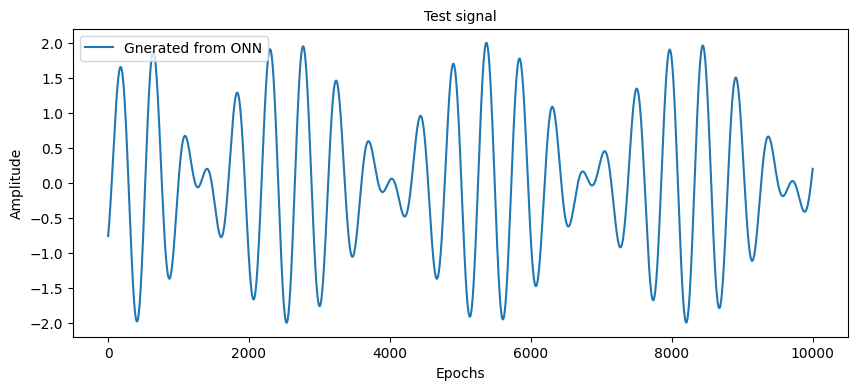

In [7]:
o = ONN(N=2, NEPOCHS=200)

# #vald_signal, vald_signal_, signal_ = o.generate_test_samples()
testSignal = o.generate_test_samples(NSAMPLES=10000)

# print(vald_signal.shape)
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(4)
plt.plot(np.linspace(1, len(testSignal), len(testSignal)), testSignal, label="Gnerated from ONN")
plt.xlabel("Epochs")
plt.ylabel("Amplitude")
plt.title("Test signal")
plt.legend()
plt.show()

# scalar = preprocessing.MinMaxScaler(feature_range=(-3, 3))
# scaled_data = testSignal 
# time = np.linspace(1, len(scaled_data), len(scaled_data))

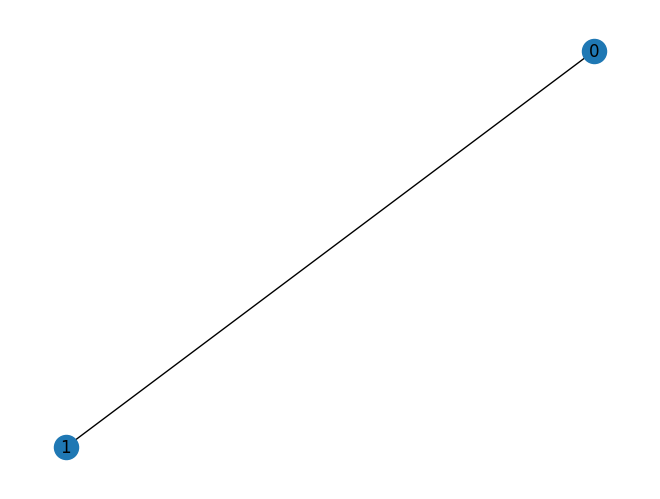

In [8]:
# Create a graph from the adjacency matrix
G = nx.from_numpy_array(o.A_Test)

# Draw the graph
pos = nx.circular_layout(G)
f = plt.figure()
nx.draw(G, pos, with_labels=True)
plt.show()

In [29]:
def Run():
    o.initialize()

    # Assumption: We know forwards weights (alpha), frequency (omega), 
    # and inital phase is for now set as per actual value in the test signal.
    o.ALPHA = o.ALPHA_Test
    o.OMEGA = o.OMEGA_Test
    #o.PHI = o.PHI_Test

    # A needs to be adjusted. We know the binary connection but not the strength
    o.A = 0.4*o.A_Test

    o.fit(testSignal)

th1 = threading.Thread(target=Run).start()

Updated weight:  [-10.  10.]
Updated weight:  [-8.854961 10.      ]
Updated weight:  [-9.91582657  9.99999966]
Updated weight:  [-9.92696268 10.        ]
Updated weight:  [-9.92523463 10.        ]
Updated weight:  [-9.92535439 10.        ]
Updated weight:  [-9.92535439 10.        ]
Solution found:
x = [-9.92535439 10.        ]
f(x) = 818.3998028343929


In [61]:
#Things to check
# 1. How important the inital setting of phase is? 
# Ans: Can the way EEG signal recorded be used to set the inital phases of oscillator accordingly?
# 2. Also what about omega? How important inital condition for OMEGA is?
# 3. Without normalized phase difference, does this learning work?

100.0

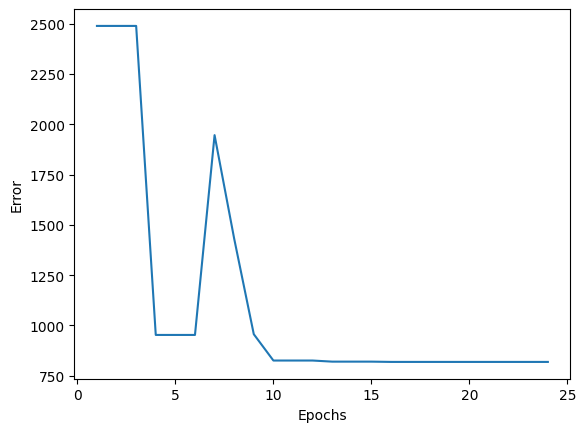

In [30]:
#Error with each epoch
epoch = len(o.ERR)
f = plt.figure()
plt.plot(np.linspace(1, epoch, epoch), o.ERR)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

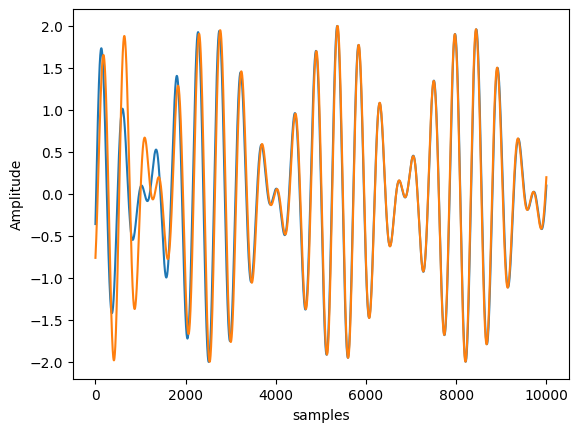

In [31]:
#Reconstructed signal
reconstructedSignal = o.generate_samples(o.NSAMPLES, 1/o.SAMPLING_RATE, 
                                         o.PHI, o.OMEGA, o.A, o.ALPHA)
f = plt.figure()
plt.plot(np.linspace(1, o.NSAMPLES, o.NSAMPLES), reconstructedSignal, label="Reconstructed")
plt.plot(np.linspace(1, o.NSAMPLES, o.NSAMPLES), testSignal, label="Test")
plt.xlabel("samples")
plt.ylabel("Amplitude")
plt.show()

In [ ]:
#For intial phi0 include PHI0 vector
# Make phi0 learnable
# Try increasing number of timepoints in timeseries data
# Include amplitude of each oscillator as well